# Initial setting

## libraries

In [2]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css"
).text
HTML(styles)

In [3]:
import re
import requests
from time import sleep
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

## dataset

In [4]:
# Load data
df = pd.read_csv('data/df_fifa.csv')

To do
- a

# EDA

## Overall score

[Text(0.5, 0, 'Overall score'),
 Text(0.5, 1.0, 'Distribution of overall score, 2015 - 2020')]

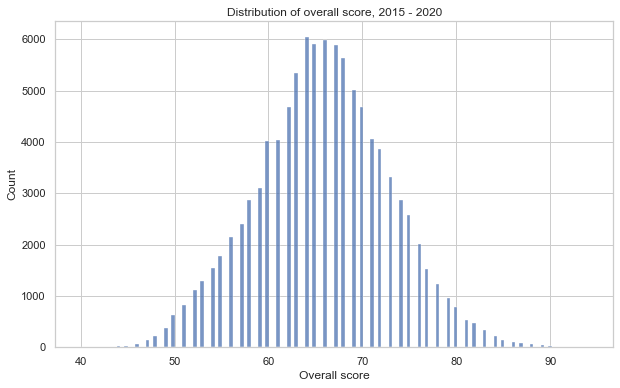

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sns.histplot(df.overall, ax=ax)
ax.set(xlabel='Overall score', title='Distribution of overall score, 2015 - 2020')

In [6]:
df.head()

,sofifa_id,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,work_rate,body_type,release_clause_eur,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,year,league_name,d_trait_Avoids_Using_Weaker_Foot,d_trait_Beat_Offside_Trap,d_trait_Finesse_Shot,d_trait_Long_Throw-in,d_trait_Through_Ball,d_trait_Takes_Finesse_Free_Kicks,d_trait_Power_Header,d_trait_Injury_Free,d_trait_Crowd_Favourite,d_trait_1-on-1_Rush,d_trait_Flair,d_trait_Outside_Foot_Shot,d_trait_Inflexible,d_trait_Giant_Throw-in,d_trait_Cautious_With_Crosses,d_trait_Saves_with_Feet,d_trait_Puncher,d_trait_Rushes_Out_Of_Goal,d_trait_Skilled_Dribbling,d_trait_Backs_Into_Player,d_trait_Second_Wind,d_trait_Set_Play_Specialist,d_trait_Leadership,d_trait_Comes_For_Crosses,d_trait_GK_Up_for_Corners,d_trait_Swerve_Pass,...,d_pos_RW,d_pos_RB,ab_pace,ab_shooting,ab_passing,ab_dribbling,ab_defending,ab_physic,ab_skill_moves,ab_gk_diving,ab_gk_handling,ab_gk_kicking,ab_gk_reflexes,ab_gk_speed,ab_gk_positioning,ab_attacking_crossing,ab_attacking_finishing,ab_attacking_heading_accuracy,ab_attacking_short_passing,ab_attacking_volleys,ab_skill_dribbling,ab_skill_curve,ab_skill_fk_accuracy,ab_skill_long_passing,ab_skill_ball_control,ab_movement_acceleration,ab_movement_sprint_speed,ab_movement_agility,ab_movement_reactions,ab_movement_balance,ab_power_shot_power,ab_power_jumping,ab_power_stamina,ab_power_strength,ab_power_long_shots,ab_mentality_aggression,ab_mentality_interceptions,ab_mentality_positioning,ab_mentality_vision,ab_mentality_penalties,ab_mentality_composure,ab_defending_marking,ab_defending_standing_tackle,ab_defending_sliding_tackle,ab_goalkeeping_diving,ab_goalkeeping_handling,ab_goalkeeping_kicking,ab_goalkeeping_positioning,ab_goalkeeping_reflexes,d_foot_left
0,158023,L. Messi,27,1987-06-24,169,67,Argentina,FC Barcelona,93,0,0,Left,5,3,Medium/Low,Normal,NaN,CF,10.0,NaN,2004-07-01,2018.0,2015,Spain Primera Division,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,93.0,89.0,86.0,96.0,27.0,63.0,4,NaN,NaN,NaN,NaN,NaN,NaN,84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,NaN,25,21,20,6,11,15,14,8,1
1,20801,Cristiano Ronaldo,29,1985-02-05,185,80,Portugal,Real Madrid,92,0,0,Right,5,4,High/Low,Normal,NaN,LW,7.0,NaN,2009-07-01,2018.0,2015,Spain Primera Division,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,93.0,93.0,81.0,91.0,32.0,79.0,5,NaN,NaN,NaN,NaN,NaN,NaN,83,95,86,82,87,93,88,79,72,92,91,94,93,90,63,94,94,89,79,93,63,24,91,81,85,NaN,22,31,23,7,11,15,14,11,0
2,9014,A. Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,90,0,0,Left,5,2,High/Low,Normal,NaN,SUB,10.0,NaN,2009-08-28,2017.0,2015,German 1. Bundesliga,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,93.0,86.0,83.0,92.0,32.0,64.0,4,NaN,NaN,NaN,NaN,NaN,NaN,80,85,50,86,86,93,85,83,76,90,93,93,93,89,91,86,61,78,65,90,47,39,89,84,80,NaN,29,26,26,10,8,11,5,15,1
3,41236,Z. Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,90,0,0,Right,5,4,Medium/Low,Normal,NaN,ST,10.0,NaN,2012-07-01,2016.0,2015,French Ligue 1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,76.0,91.0,81.0,86.0,34.0,86.0,4,NaN,NaN,NaN,NaN,NaN,NaN,76,91,76,84,92,88,80,80,76,90,74,77,86,85,41,93,72,78,93,88,84,20,86,83,91,NaN,25,41,27,13,15,10,9,12,0
4,167495,M. Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,90,0,0,Right,5,4,Medium/Medium,Normal,NaN,GK,1.0,NaN,2011-07-01,2019.0,2015,German 1. Bundesliga,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,87.0,85.0,92.0,86.0,60.0,90.0,25,25,25,42,25,25,25,25,41,31,58,61,43,89,35,42,78,44,83,25,29,30,25,20,37,NaN,25,25,25,87,85,92,90,86,0


[Text(0.5, 0, 'International reputation (1-5)'),
 Text(0, 0.5, 'Overall score'),
 Text(0.5, 1.0, 'Distribution of overall score, 2015 - 2020')]

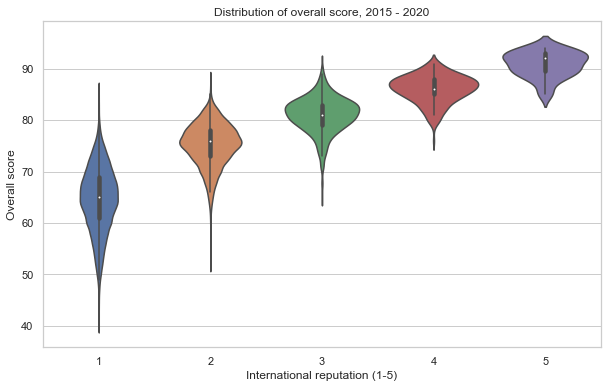

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
#sns.barplot(x='international_reputation', y='overall', data=df)
sns.violinplot(x='international_reputation', y='overall', data=df)
ax.set(xlabel='International reputation (1-5)', ylabel='Overall score', title='Distribution of overall score, 2015 - 2020')

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Overall score'),
 Text(0.5, 1.0, 'Distribution of overall score, 2015 - 2020')]

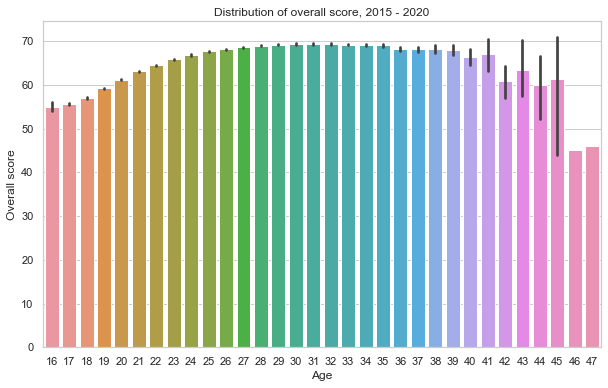

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sns.barplot(x='age', y='overall', data=df)
ax.set(xlabel='Age', ylabel='Overall score', title='Distribution of overall score, 2015 - 2020')

## ideas

- create region variable?